In [1]:
# Reference : https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

Time Series have several key features such as trend, seasonality, and noise.

ARIMA model, which stands for AutoRegressive Integrated Moving Average.

In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values. For example, forecasting that if it rained a lot over the past few days, you state its likely that it will rain tomorrow as well.

d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series. You can imagine an example of this as forecasting that the amount of rain tomorrow will be similar to the amount of rain today, if the daily amounts of rain have been similar over the past few days.

q is the parameter associated with the moving average part of the model.

If our model has a seasonal component, we use a seasonal ARIMA model (SARIMA). In that case we have another set of parameters: P,D, and Q which describe the same associations as p,d, and q, but correspond with the seasonal components of the model.

In [3]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/manishanker/AutoArima-Time-Series-Blog/master/Electric_Production.csv",
                   index_col=0)
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [4]:
data.shape

(397, 1)

In [5]:
data.index = pd.to_datetime(data.index)

In [6]:
data.columns = ['Energy Production']

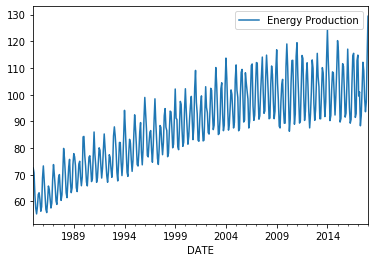

In [7]:
%matplotlib inline
data.plot()

<Figure size 864x576 with 0 Axes>

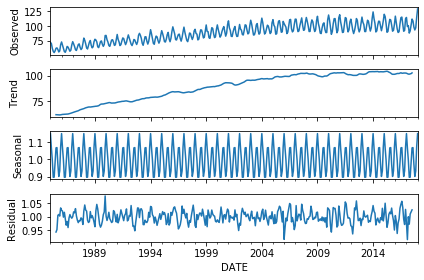

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt  
plt.figure(figsize=(12, 8))  
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()

From the plot above we can clearly see the seasonal component of the data, and we can also see the separated upward trend of the data.

One simple approach is to perform a grid search over multiple values of p,d,q,P,D,and Q using some sort of performance criteria. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data

In [8]:
!pip install pyramid

In [10]:
! pip install pyramid

In [ ]:
!pip install pyramid-arima

In [9]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

ModuleNotFoundError: No module named 'pyramid.arima'

In [3]:
!pip install pyramid-arima

In [17]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [19]:
train.shape

(384, 1)

In [24]:
train[0:10]

,Energy Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


In [20]:
test.shape

(13, 1)

In [25]:
test[0:10]

,Energy Production
DATE,
2017-01-01,114.8505
2017-02-01,99.4901
2017-03-01,101.0396
2017-04-01,88.3530
2017-05-01,92.0805
2017-06-01,102.1532
2017-07-01,112.1538
2017-08-01,108.9312
2017-09-01,98.6154


In [21]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(2, 1, 2, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [22]:
future_forecast = stepwise_model.predict(n_periods=13)
# This returns an array of predictions:>>>
print(future_forecast)

[120.95585223 109.87981733 100.38254332  90.56716717  92.17592454
 103.28594092 112.97779707 112.23087913 100.95879342  91.92545297
  95.7296424  111.20604258 120.32106996]


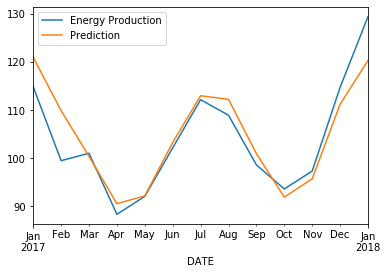

In [23]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

<Figure size 1080x720 with 0 Axes>

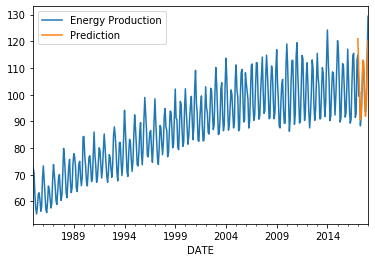

In [29]:
plt.figure(figsize=(15, 10))  
pd.concat([data,future_forecast],axis=1).plot()